PHASE 2: DATA CLEANING & PREPROCESSING

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [5]:
df = pd.read_csv("books_raw_data.csv")
df.head()

,title,price,rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5


In [6]:
df.shape 

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1000 non-null   object 
 1   price   1000 non-null   float64
 2   rating  1000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [8]:
df.describe()

,price,rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [9]:
df.isnull().sum()

title     0
price     0
rating    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

title      object
price     float64
rating      int64
dtype: object

In [12]:
#Feature 1: Price Band
def price_category(price):
    if price < 20:
        return "Low"
    elif price < 40:
        return "Medium"
    else:
        return "High"

df["price_band"] = df["price"].apply(price_category)
df.head()

,title,price,rating,price_band
0,A Light in the Attic,51.77,3,High
1,Tipping the Velvet,53.74,1,High
2,Soumission,50.10,1,High
3,Sharp Objects,47.82,4,High
4,Sapiens: A Brief History of Humankind,54.23,5,High


In [13]:
#Feature 2: Rating Category
def rating_category(rating):
    if rating <= 2:
        return "Low"
    elif rating <= 4:
        return "Medium"
    else:
        return "High"

df["rating_category"] = df["rating"].apply(rating_category)

In [14]:
#Feature 3: Popularity Score
df["popularity_score"] = df["rating"] * df["price"]

In [15]:
df.head()

,title,price,rating,price_band,rating_category,popularity_score
0,A Light in the Attic,51.77,3,High,Medium,155.31
1,Tipping the Velvet,53.74,1,High,Low,53.74
2,Soumission,50.10,1,High,Low,50.10
3,Sharp Objects,47.82,4,High,Medium,191.28
4,Sapiens: A Brief History of Humankind,54.23,5,High,High,271.15


In [16]:
df.shape

(1000, 6)

In [17]:
df.to_csv("books_cleaned_data.csv", index=False)
print("Cleaned dataset saved")

Cleaned dataset saved


PHASE 3: Exploratory Data Analysis & Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [19]:
df = pd.read_csv("books_cleaned_data.csv")
df.head()

,title,price,rating,price_band,rating_category,popularity_score
0,A Light in the Attic,51.77,3,High,Medium,155.31
1,Tipping the Velvet,53.74,1,High,Low,53.74
2,Soumission,50.10,1,High,Low,50.10
3,Sharp Objects,47.82,4,High,Medium,191.28
4,Sapiens: A Brief History of Humankind,54.23,5,High,High,271.15


In [20]:
df.describe()

,price,rating,popularity_score
count,1000.00000,1000.000000,1000.000000
mean,35.07035,2.923000,103.093950
std,14.44669,1.434967,70.647684
min,10.00000,1.000000,10.400000
25%,22.10750,2.000000,46.225000
50%,35.98000,3.000000,83.850000
75%,47.45750,4.000000,149.530000
max,59.99000,5.000000,299.600000


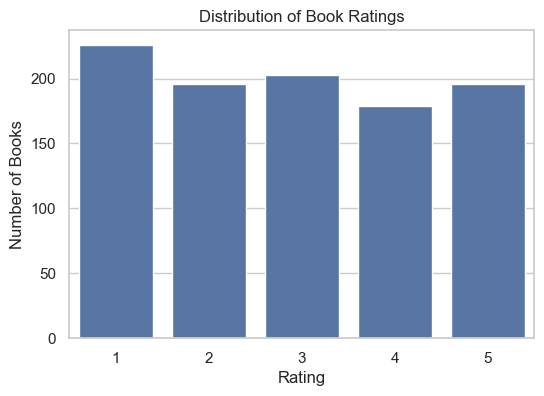

In [21]:
#DISTRIBUTION OF BOOK RATINGS
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=df)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")

plt.savefig("Exploratory Data Analysis & Visualization/rating_distribution.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
#insights:
#Most books are concentrated around mid to high ratings, indicating generally positive customer feedback across the platform.

In [ ]:
#PRICE DISTRIBUTION
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=20, kde=True)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.savefig("Exploratory Data Analysis & Visualization/price_distribution.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [22]:
#Insights
#Book prices are right-skewed, with most books priced in the lower to medium range and fewer high-priced books.

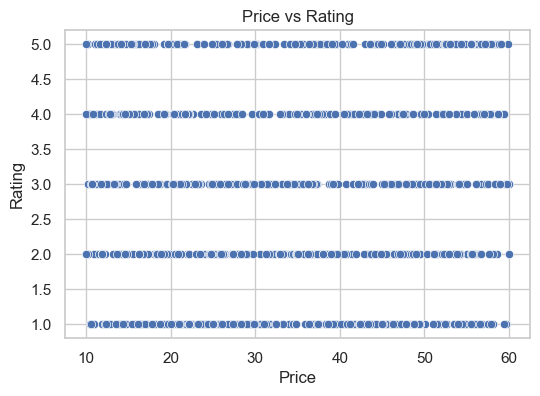

In [23]:
#PRICE vs RATING (RELATIONSHIP)
plt.figure(figsize=(6,4))
sns.scatterplot(x="price", y="rating", data=df)
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")

plt.savefig("Exploratory Data Analysis & Visualization/price_vs_rating.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [24]:
#Insight
#There is no strong linear relationship between price and rating, suggesting that higher-priced books are not necessarily rated higher.

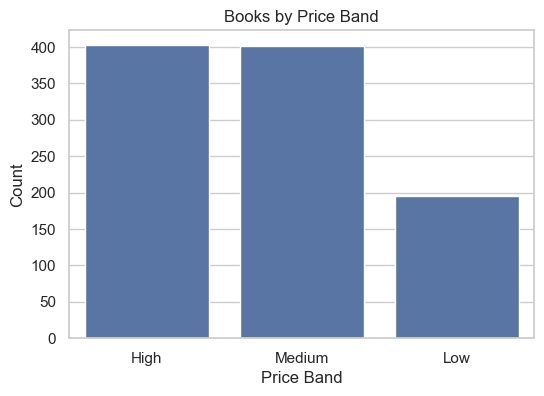

In [25]:
#PRICE BAND ANALYSIS
plt.figure(figsize=(6,4))
sns.countplot(x="price_band", data=df)
plt.title("Books by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Count")

plt.savefig("Exploratory Data Analysis & Visualization/price_band_distribution.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [26]:
#Insight
#Most books fall under the low and medium price bands, indicating affordability-focused pricing strategies.

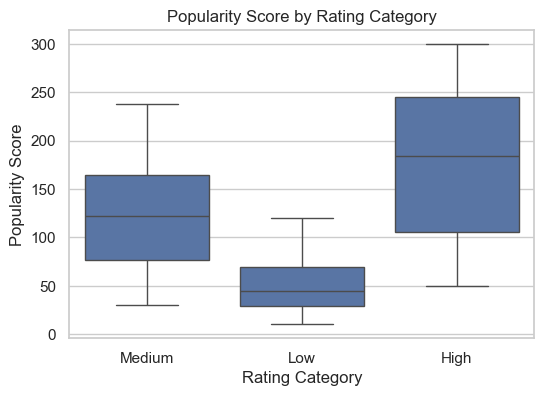

In [27]:
#POPULARITY SCORE ANALYSIS
plt.figure(figsize=(6,4))
sns.boxplot(x="rating_category", y="popularity_score", data=df)
plt.title("Popularity Score by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Popularity Score")

plt.savefig("Exploratory Data Analysis & Visualization/popularity_by_rating.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [28]:
#Insight
#Books with higher ratings generally show higher popularity scores, reinforcing the importance of customer satisfaction.

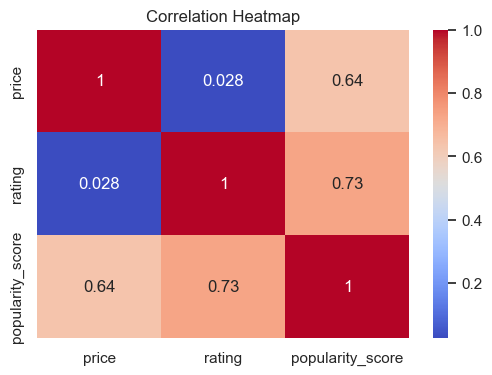

In [29]:
#CORRELATION HEATMAP
plt.figure(figsize=(6,4))
sns.heatmap(df[["price", "rating", "popularity_score"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.savefig("Exploratory Data Analysis & Visualization/correlation_heatmap.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [30]:
#Insight
#Popularity score is positively correlated with rating, while price shows weak correlation with rating.

In [31]:
import os

folder_name = "Exploratory Data Analysis & Visualization"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

print("Folder ready")

Folder ready


In [32]:
#“All exploratory visualizations were programmatically generated and saved for reproducibility and reporting.”

PHASE 4 Model Building & Evaluation

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [34]:
X = df[["price", "rating", "popularity_score"]]
X.head()

,price,rating,popularity_score
0,51.77,3,155.31
1,53.74,1,53.74
2,50.10,1,50.10
3,47.82,4,191.28
4,54.23,5,271.15


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
wcss = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

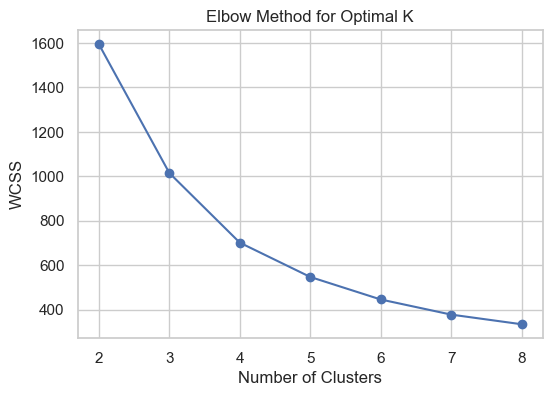

In [37]:
#Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(range(2, 9), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.savefig("Exploratory Data Analysis & Visualization/elbow_method.png",
            dpi=300, bbox_inches="tight")
plt.show()

In [38]:
#“Based on the elbow method, 3 clusters were selected as the optimal segmentation.”

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

df.head()

,title,price,rating,price_band,rating_category,popularity_score,cluster
0,A Light in the Attic,51.77,3,High,Medium,155.31,2
1,Tipping the Velvet,53.74,1,High,Low,53.74,1
2,Soumission,50.10,1,High,Low,50.10,1
3,Sharp Objects,47.82,4,High,Medium,191.28,2
4,Sapiens: A Brief History of Humankind,54.23,5,High,High,271.15,2


In [40]:
score = silhouette_score(X_scaled, df["cluster"])
score

np.float64(0.41712746292373865)

In [41]:
df.groupby("cluster")[["price", "rating", "popularity_score"]].mean()

,price,rating,popularity_score
cluster,,,
0,20.796766,3.627063,75.166997
1,36.494615,1.428205,53.261205
2,47.348632,4.127036,193.962476


In [42]:
df.to_csv("books_clustered_data.csv", index=False)
print("Clustered dataset saved")

Clustered dataset saved
